In [1]:
import pandas as pd
import matplotlib
import theano
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
from neupy import algorithms, layers, init, environment, plots
from neupy.exceptions import StopTraining

In [2]:
environment.reproducible() 
learn_data=pd.read_csv("../learn_data.csv", index_col=0)
learn_data=np.array(learn_data)
validation_data=pd.read_csv("../valid_data.csv", index_col=0)
validation_data=np.array(validation_data)
test_data=pd.read_csv("../test_data.csv", index_col=0)
test_data=np.array(test_data)
eps=0.000001
number_of_epochs=5000
nets={}

In [3]:
learn_params=learn_data[:,[0,1]]
learn_target=learn_data[:,[2]]
test_params=test_data[:,[0,1]]
test_target=test_data[:,[2]]
validation_params=validation_data[:,[0,1]]
validation_target=validation_data[:,[2]]

In [4]:
test_errors=[]
def signal(net):
    test_errors.append(((net.predict(test_params)-test_target)**2).sum()/len(test_target))
    if len(net.errors)>20:
        if abs(net.errors[len(net.errors)-1]-net.errors[len(net.errors)-2]) < eps:
            raise StopTraining("Training has been interrupted")

In [5]:
#4.12 г,д
bpnet=algorithms.GradientDescent(
    connection=[
        layers.Input(2),
        layers.Tanh(10 weight=init.Normal(std=0.05), bias=init.Normal(std=0.05)),
        layers.Tanh(10, weight=init.Normal(std=0.05), bias=init.Normal(std=0.05)),
        layers.Tanh(5, weight=init.Normal(std=0.05), bias=init.Normal(std=0.05)),
        layers.Linear(1, weight=init.Normal(std=0.05), bias=init.Normal(std=0.05))
    ],     
    error='mse',
    verbose=True,
    show_epoch=50,
    epoch_end_signal=signal,
    step=0.05
)


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 1.48 seconds


In [6]:
bpnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)


Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      1.0049 |      1.0018 |       21 ms |
|          50 |      1.0033 |      1.0014 |        4 ms |
|         100 |      1.0028 |      1.0009 |        4 ms |
|         150 |       1.002 |      1.0001 |        7 ms |
|         200 |      1.0001 |     0.99819 |        7 ms |
|         250 |     0.99312 |     0.99092 |        5 ms |
|         300 |      0.9104 |     0.90097 |        7 ms |
|         350 |     0.17222 |     0.16351 |        5 ms |
|         400 |     0.16321 |      0.1555 |        5 ms |
|         450 |      0.1575 |      0.1504 |        7 ms |
|         500 |     0.15362 |     0.14698 |        4 ms |
|         550 |     0.15087 |      0.1446 |        7 ms |
|         600 |   

small std train error 0.1380606408261015
small std test error 0.12165385761521945


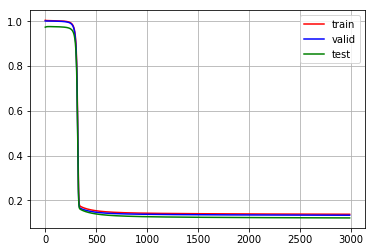

In [7]:
print("small std train error "+str(bpnet.train_errors.last()))
print("small std test error "+str(test_errors[len(test_errors)-1]))
plt.clf()
plt.grid(True)
plt.plot(bpnet.train_errors, color='r', label='train') 
plt.plot(bpnet.validation_errors, color='b', label='valid') 
plt.plot(test_errors, color='g', label='test')
plt.legend()
plt.savefig('Small_std_train_valid_test.png', bbox_inches='tight')

In [8]:
test_errors=[]
bpnet=algorithms.GradientDescent(
    connection=[
     layers.Input(2),
     layers.Tanh(10, weight=init.XavierNormal(), bias=init.XavierNormal()),
     layers.Tanh(10, weight=init.XavierNormal(), bias=init.XavierNormal()),
     layers.Tanh(5, weight=init.XavierNormal(), bias=init.XavierNormal()),
     layers.Linear(1, weight=init.XavierNormal(), bias=init.XavierNormal()),
    ],     
    error='mse',
    verbose=True,
    show_epoch=50,
    epoch_end_signal=signal,
    step=0.05
)


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.44 seconds


In [9]:
bpnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)


Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      2.2442 |      0.6987 |       15 ms |
|          50 |     0.18602 |     0.17711 |        6 ms |
|         100 |     0.16225 |     0.15617 |        8 ms |
|         150 |     0.15081 |     0.14615 |        8 ms |
|         200 |     0.14429 |     0.14032 |       11 ms |
|         250 |      0.1401 |     0.13645 |        6 ms |
|         300 |     0.13724 |     0.13376 |        5 ms |
|         350 |     0.13526 |     0.13188 |        7 ms |
|         400 |     0.13387 |     0.13057 |        5 ms |
|         450 |      0.1329 |     0.12967 |        6 ms |
|         500 |     0.13221 |     0.12905 |        6 ms |
|         550 |     0.13172 |     0.12861 |        5 ms |
|         600 |   

xavier std train error 0.12906491920500035
xavier std test error 0.11581594072732719


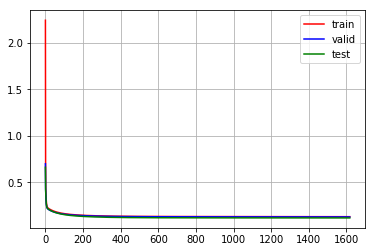

In [10]:
print("xavier std train error "+str(bpnet.train_errors.last()))
print("xavier std test error "+str(test_errors[len(test_errors)-1]))
plt.clf()
plt.grid(True)
plt.plot(bpnet.train_errors, color='r', label='train') 
plt.plot(bpnet.validation_errors, color='b', label='valid') 
plt.plot(test_errors, color='g', label='test')
plt.legend()
plt.savefig('Xavier_std_train_valid_test.png', bbox_inches='tight')

In [11]:
test_errors=[]
bpnet=algorithms.GradientDescent(
    connection=[
        layers.Input(2),
        layers.Tanh(10, weight=init.Normal(std=5), bias=init.Normal(std=5)),
        layers.Tanh(10, weight=init.Normal(std=5), bias=init.Normal(std=5)),
        layers.Tanh(5, weight=init.Normal(std=5), bias=init.Normal(std=5)),
        layers.Linear(1, weight=init.Normal(std=5), bias=init.Normal(std=5))
    ],     
    error='mse',
    verbose=True,
    show_epoch=50,
    epoch_end_signal=signal,
    step=0.05
)


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.36 seconds


In [12]:
bpnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)


Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      66.352 |      33.134 |        6 ms |
|          50 |      2.2632 |      2.3643 |        6 ms |
|         100 |      1.1777 |      1.2824 |        6 ms |
|         150 |     0.85495 |     0.93887 |        7 ms |
|         200 |     0.68028 |      0.7549 |        6 ms |
|         250 |     0.57359 |     0.63283 |        6 ms |
|         300 |      0.5013 |     0.55087 |        6 ms |
|         350 |       0.453 |     0.49309 |        7 ms |
|         400 |     0.41876 |     0.45224 |        8 ms |
|         450 |     0.39357 |     0.42408 |        6 ms |
|         500 |     0.37631 |      0.4025 |        6 ms |
|         550 |     0.36056 |     0.38404 |        8 ms |
|         600 |   

big std train error 0.21655233747695515
big std test error 0.21548358059877942


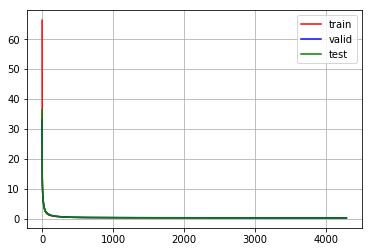

In [13]:
print("big std train error "+str(bpnet.train_errors.last()))
print("big std test error "+str(test_errors[len(test_errors)-1]))
plt.clf()
plt.grid(True)
plt.plot(bpnet.train_errors, color='r', label='train') 
plt.plot(bpnet.validation_errors, color='b', label='valid') 
plt.plot(test_errors, color='g', label='test')
plt.legend()
plt.savefig('Big_std_train_valid_test.png', bbox_inches='tight')

In [28]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [55]:
def fill_matrix(matr, filler):
    for i in range(matr.shape[0]):
        for j in range(matr.shape[1]):
            matr[i,j]=filler.rvs(1)[0]
    return matr
quant=1.645

In [21]:
test_errors_task=[]
learn_errors_task=[]
for i in range(10):
    test_errors=[]
    bpnet=algorithms.GradientDescent(
        connection=[
            layers.Input(2),
            layers.Tanh(10, weight=init.Uniform(minval=-0.05*0.57735, maxval=0.05*0.57735), bias=init.Uniform(minval=-0.05*0.57735, maxval=0.05*0.57735)),
            layers.Tanh(10, weight=init.Uniform(minval=-0.05*0.57735, maxval=0.05*0.57735), bias=init.Uniform(minval=-0.05*0.57735, maxval=0.05*0.57735)),
            layers.Tanh(5, weight=init.Uniform(minval=-0.05*0.57735, maxval=0.05*0.57735), bias=init.Uniform(minval=-0.05*0.57735, maxval=0.05*0.57735)),
            layers.Linear(1, weight=init.Uniform(minval=-0.05*0.57735, maxval=0.05*0.57735), bias=init.Uniform(minval=-0.05*0.57735, maxval=0.05*0.57735))
        ],     
        error='mse',
        verbose=True,
        show_epoch=1000,
        epoch_end_signal=signal,
        step=0.05
    )
    bpnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)
    test_errors_task.append(test_errors[len(test_errors)-1])
    learn_errors_task.append(bpnet.errors.last())
print("mean learn error uniform small std "+str(np.array(learn_errors_task).mean()))
print("std learn error uniform small std "+str(np.array(learn_errors_task).std()))
print("mean test error uniform small std "+str(np.array(test_errors_task).mean()))
print("std test error uniform small std "+str(np.array(test_errors_task).std()))


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.42 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      1.0034 |      1.0015 |        4 ms |
---------------------------------------------------------
[TRAIN] Epoch #21 stopped. Training has been interrupted
|          21 |      1.0034 |      1.0015 |        4 ms |


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal

[THEANO] Initialization finished successfully. It took 0.38 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      1.0036 |      1.0013 |        6 ms |
---------------------------------------------------------
[TRAIN] Epoch #21 stopped. Training has been interrupted
|          21 |      1.0034 |      1.0015 |        6 ms |

mean test error uniform small std 0.9765005673370176
std test error uniform small std 0.0001650353172430409
mean learn error uniform small std 1.00336892432495
std learn error uniform small std 3.897748356109652e-06


In [19]:
test_errors_task=[]
learn_errors_task=[]
for i in range(10):
    test_errors=[]
    bpnet=algorithms.GradientDescent(
        connection=[
            layers.Input(2),
            layers.Tanh(10, weight=init.Normal(std=0.05), bias=init.Normal(std=0.05)),
            layers.Tanh(10, weight=init.Normal(std=0.05), bias=init.Normal(std=0.05)),
            layers.Tanh(5, weight=init.Normal(std=0.05), bias=init.Normal(std=0.05)),
            layers.Linear(1, weight=init.Normal(std=0.05), bias=init.Normal(std=0.05))
        ],     
        error='mse',
        verbose=True,
        show_epoch=1000,
        epoch_end_signal=signal,
        step=0.05
    )
    bpnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)
    test_errors_task.append(test_errors[len(test_errors)-1])
    learn_errors_task.append(bpnet.errors.last())
print("mean learn error normal small std "+str(np.array(learn_errors_task).mean()))
print("std learn error normal small std "+str(np.array(learn_errors_task).std()))
print("mean test error normal small std "+str(np.array(test_errors_task).mean()))
print("std test error normal small std "+str(np.array(test_errors_task).std()))   

    


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.58 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      1.0047 |      1.0016 |        5 ms |
|        1000 |      0.1418 |     0.13702 |        5 ms |
|        2000 |     0.13788 |     0.13364 |        5 ms |
---------------------------------------------------------
[TRAIN] Epoch #2805 stopped. Training has been interrupted
|        2805 |     0.13682 |     0.13

[THEANO] Initialization finished successfully. It took 0.45 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      1.0037 |      1.0013 |        5 ms |
|        1000 |     0.14193 |      0.1373 |        5 ms |
|        2000 |     0.13809 |     0.13381 |        6 ms |
---------------------------------------------------------
[TRAIN] Epoch #2879 stopped. Training has been interrupted
|        2879 |     0.13688 |     0.13267 |        9 ms |


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano vari

In [62]:
test_errors_task=[]
learn_errors_task=[]
for i in range(10):
    test_errors=[]
    filler=get_truncated_normal(sd=0.05, low=-0.05*quant, upp=0.05*quant)
    weights1=fill_matrix(np.empty((2,10)), filler)
    weights2=fill_matrix(np.empty((10,10)), filler)
    weights3=fill_matrix(np.empty((10,5)), filler)
    weights4=fill_matrix(np.empty((5,1)), filler)
    bpnet=algorithms.GradientDescent(
        connection=[
            layers.Input(2),
            layers.Tanh(10, weight=weights1, bias=filler.rvs(10)),
            layers.Tanh(10, weight=weights2, bias=filler.rvs(10)),
            layers.Tanh(5, weight=weights3, bias=filler.rvs(5)),
            layers.Linear(1, weight=weights4, bias=filler.rvs(1))
        ],     
        error='mse',
        verbose=True,
        show_epoch=1000,
        epoch_end_signal=signal,
        step=0.05
    )
    bpnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)
    test_errors_task.append(test_errors[len(test_errors)-1])
    learn_errors_task.append(bpnet.errors.last())
print("mean learn error truncated normal small std "+str(np.array(learn_errors_task).mean()))
print("std learn error truncated normal small std "+str(np.array(learn_errors_task).std()))
print("mean test error truncated normal small std "+str(np.array(test_errors_task).mean()))
print("std test error truncated normal small std "+str(np.array(test_errors_task).std()))   


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.37 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      1.0034 |      1.0013 |        4 ms |
---------------------------------------------------------
[TRAIN] Epoch #32 stopped. Training has been interrupted
|          32 |      1.0033 |      1.0015 |        4 ms |


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal

[THEANO] Initialization finished successfully. It took 0.38 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      1.0045 |      1.0014 |        4 ms |
|        1000 |      0.1444 |     0.13924 |        4 ms |
|        2000 |      0.1401 |     0.13545 |        4 ms |
---------------------------------------------------------
[TRAIN] Epoch #2706 stopped. Training has been interrupted
|        2706 |     0.13918 |     0.13461 |        5 ms |


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano vari

In [23]:
test_errors_task=[]
learn_errors_task=[]
for i in range(10):
    test_errors=[]
    bpnet=algorithms.GradientDescent(
        connection=[
            layers.Input(2),
            layers.Tanh(10, weight=init.Uniform(minval=-2/(2+10+1)*0.577, maxval=2/(2+10+1)*0.577), bias=init.Uniform(minval=-2/(2+10+1)*0.577, maxval=2/(2+10+1)*0.577)),
            layers.Tanh(10, weight=init.Uniform(minval=-2/(10+10+1)*0.577, maxval=2/(10+10+1)*0.577), bias=init.Uniform(minval=-2/(10+10+1)*0.577, maxval=2/(10+10+1)*0.577)),
            layers.Tanh(5, weight=init.Uniform(minval=-2/(10+5+1)*0.577, maxval=2/(10+5+1)*0.577), bias=init.Uniform(minval=-2/(10+5+1)*0.577, maxval=2/(10+5+1)*0.577)),
            layers.Linear(1, weight=init.Uniform(minval=-4/(1+5+1)*0.577, maxval=4/(1+5+1)*0.577), bias=init.Uniform(minval=-4/(1+5+1)*0.577, maxval=4/(1+5+1)*0.577))
        ],     
        error='mse',
        verbose=True,
        show_epoch=1000,
        epoch_end_signal=signal,
        step=0.05
    )
    bpnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)
    test_errors_task.append(test_errors[len(test_errors)-1])
    learn_errors_task.append(bpnet.errors.last())
print("mean learn error uniform xavier std "+str(np.array(learn_errors_task).mean()))
print("std learn error uniform xavier std "+str(np.array(learn_errors_task).std()))
print("mean test error uniform xavier std "+str(np.array(test_errors_task).mean()))
print("std test error uniform xavier std "+str(np.array(test_errors_task).std()))   


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.36 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      1.0281 |      1.0159 |        4 ms |
|        1000 |     0.14049 |     0.13596 |        4 ms |
|        2000 |     0.13809 |     0.13379 |        4 ms |
---------------------------------------------------------
[TRAIN] Epoch #2630 stopped. Training has been interrupted
|        2630 |     0.13735 |     0.13

[THEANO] Initialization finished successfully. It took 0.40 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      1.0651 |      1.0554 |        4 ms |
|        1000 |     0.14045 |     0.13586 |        5 ms |
|        2000 |     0.13796 |     0.13366 |        5 ms |
---------------------------------------------------------
[TRAIN] Epoch #2605 stopped. Training has been interrupted
|        2605 |     0.13724 |     0.13301 |        5 ms |


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano vari

In [25]:
test_errors_task=[]
learn_errors_task=[]
for i in range(10):
    test_errors=[]
    bpnet=algorithms.GradientDescent(
        connection=[
            layers.Input(2),
            layers.Tanh(10, weight=init.XavierNormal(), bias=init.XavierNormal()),
            layers.Tanh(10, weight=init.XavierNormal(), bias=init.XavierNormal()),
            layers.Tanh(5, weight=init.XavierNormal(), bias=init.XavierNormal()),
            layers.Linear(1, weight=init.XavierNormal(), bias=init.XavierNormal())
        ],     
        error='mse',
        verbose=True,
        show_epoch=1000,
        epoch_end_signal=signal,
        step=0.05
    )
    bpnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)
    test_errors_task.append(test_errors[len(test_errors)-1])
    learn_errors_task.append(bpnet.errors.last())
print("mean learn error normal xavier std "+str(np.array(learn_errors_task).mean()))
print("std learn error normal xavier std "+str(np.array(learn_errors_task).std()))
print("mean test error normal xavier std "+str(np.array(test_errors_task).mean()))
print("std test error normal xavier std "+str(np.array(test_errors_task).std()))   


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.36 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      3.5386 |     0.77203 |        9 ms |
|        1000 |     0.12917 |      0.1265 |        6 ms |
---------------------------------------------------------
[TRAIN] Epoch #1214 stopped. Training has been interrupted
|        1214 |     0.12892 |      0.1262 |        6 ms |


Main information

[ALGORITHM] Gradie

|        1000 |     0.13075 |     0.12675 |        5 ms |
---------------------------------------------------------
[TRAIN] Epoch #1963 stopped. Training has been interrupted
|        1963 |     0.12843 |     0.12486 |        6 ms |


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.63 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      5.0476 |      1.4674 |        6 ms |
|        1000 |      0.1349 |     0.1

In [63]:
test_errors_task=[]
learn_errors_task=[]
for i in range(10):
    test_errors=[]
    filler1=get_truncated_normal(sd=2/(2+10+1), low=-2/(2+10+1)*quant, upp=2/(2+10+1)*quant)
    filler2=get_truncated_normal(sd=2/(10+10+1), low=-2/(10+10+1)*quant, upp=2/(10+10+1)*quant)
    filler3=get_truncated_normal(sd=2/(5+10+1), low=-2/(5+10+1)*quant, upp=2/(5+10+1)*quant)
    filler4=get_truncated_normal(sd=4/(5+1+1), low=-4/(5+1+1)*quant, upp=4/(5+1+1)*quant)
    weights1=fill_matrix(np.empty((2,10)), filler1)
    weights2=fill_matrix(np.empty((10,10)), filler2)
    weights3=fill_matrix(np.empty((10,5)), filler3)
    weights4=fill_matrix(np.empty((5,1)), filler4)
    bpnet=algorithms.GradientDescent(
        connection=[
            layers.Input(2),
            layers.Tanh(10, weight=weights1, bias=filler1.rvs(10)),
            layers.Tanh(10, weight=weights2, bias=filler2.rvs(10)),
            layers.Tanh(5, weight=weights3, bias=filler3.rvs(5)),
            layers.Linear(1, weight=weights4, bias=filler4.rvs(1))
        ],     
        error='mse',
        verbose=True,
        show_epoch=1000,
        epoch_end_signal=signal,
        step=0.05
    )
    bpnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)
    test_errors_task.append(test_errors[len(test_errors)-1])
    learn_errors_task.append(bpnet.errors.last())
print("mean learn error truncated normal xavier std "+str(np.array(learn_errors_task).mean()))
print("std learn error truncated normal xavier std "+str(np.array(learn_errors_task).std()))
print("mean test error truncated normal xavier std "+str(np.array(test_errors_task).mean()))
print("std test error truncated normal xavier std "+str(np.array(test_errors_task).std()))   


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.37 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      1.0147 |      1.0105 |        4 ms |
|        1000 |     0.14082 |     0.13619 |        6 ms |
|        2000 |      0.1387 |     0.13428 |        5 ms |
---------------------------------------------------------
[TRAIN] Epoch #2500 stopped. Training has been interrupted
|        2500 |     0.13813 |     0.13

---------------------------------------------------------
[TRAIN] Epoch #2439 stopped. Training has been interrupted
|        2439 |     0.13734 |     0.13304 |        5 ms |


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.36 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      1.0093 |      1.0027 |        4 ms |
|        1000 |     0.14076 |     0.13624 |        4 ms |
|        2000 |     0.13844 |     0.1

In [26]:
test_errors_task=[]
learn_errors_task=[]
for i in range(10):
    test_errors=[]
    bpnet=algorithms.GradientDescent(
        connection=[
            layers.Input(2),
            layers.Tanh(10, weight=init.Uniform(minval=-5*0.57735, maxval=5*0.57735), bias=init.Uniform(minval=-5*0.57735, maxval=5*0.57735)),
            layers.Tanh(10, weight=init.Uniform(minval=-5*0.57735, maxval=5*0.57735), bias=init.Uniform(minval=-5*0.57735, maxval=5*0.57735)),
            layers.Tanh(5, weight=init.Uniform(minval=-5*0.57735, maxval=5*0.57735), bias=init.Uniform(minval=-5*0.57735, maxval=5*0.57735)),
            layers.Linear(1, weight=init.Uniform(minval=-5*0.57735, maxval=5*0.57735), bias=init.Uniform(minval=-5*0.57735, maxval=5*0.57735))
        ],     
        error='mse',
        verbose=True,
        show_epoch=1000,
        epoch_end_signal=signal,
        step=0.05
    )
    bpnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)
    test_errors_task.append(test_errors[len(test_errors)-1])
    learn_errors_task.append(bpnet.errors.last())
print("mean learn error uniform big std "+str(np.array(learn_errors_task).mean()))
print("std learn error uniform big std "+str(np.array(learn_errors_task).std()))
print("mean test error uniform big std "+str(np.array(test_errors_task).mean()))
print("std test error uniform big std "+str(np.array(test_errors_task).std()))


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.38 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      10.086 |      4.9918 |        9 ms |
|        1000 |     0.15019 |     0.15012 |        6 ms |
|        2000 |     0.14039 |     0.14193 |        6 ms |
|        3000 |      0.1361 |     0.13949 |        7 ms |
|        4000 |     0.13441 |     0.13772 |        6 ms |
---------------------------------------

|        1000 |     0.15816 |      0.1626 |        7 ms |
|        2000 |     0.14575 |     0.14667 |        7 ms |
|        3000 |     0.13816 |     0.13653 |        7 ms |
|        4000 |     0.13525 |     0.13335 |        8 ms |
|        5000 |     0.13326 |     0.13156 |        6 ms |
---------------------------------------------------------


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.35 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
--------------------------------------

In [27]:
test_errors_task=[]
learn_errors_task=[]
for i in range(10):
    test_errors=[]
    bpnet=algorithms.GradientDescent(
        connection=[
            layers.Input(2),
            layers.Tanh(10, weight=init.Normal(std=5), bias=init.Normal(std=5)),
            layers.Tanh(10, weight=init.Normal(std=5), bias=init.Normal(std=5)),
            layers.Tanh(5, weight=init.Normal(std=5), bias=init.Normal(std=5)),
            layers.Linear(1, weight=init.Normal(std=5), bias=init.Normal(std=5))
        ],     
        error='mse',
        verbose=True,
        show_epoch=1000,
        epoch_end_signal=signal,
        step=0.05
    )
    bpnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)
    test_errors_task.append(test_errors[len(test_errors)-1])
    learn_errors_task.append(bpnet.errors.last())
print("mean learn error normal big std "+str(np.array(learn_errors_task).mean()))
print("std learn error normal big std "+str(np.array(learn_errors_task).std()))
print("mean test error normal big std "+str(np.array(test_errors_task).mean()))
print("std test error normal big std "+str(np.array(test_errors_task).std()))


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.57 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      181.31 |      39.866 |        6 ms |
|        1000 |     0.63404 |     0.67958 |        6 ms |
|        2000 |      0.6066 |      0.6409 |        6 ms |
|        3000 |     0.45672 |     0.47277 |        7 ms |
|        4000 |     0.30782 |     0.30593 |        9 ms |
|        5000 |     0.25758 |     0.250

|        1000 |     0.26622 |     0.45602 |        6 ms |
---------------------------------------------------------
[TRAIN] Epoch #1919 stopped. Training has been interrupted
|        1919 |      0.2546 |       0.432 |        6 ms |


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.40 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      55.506 |      8.2978 |        7 ms |
|        1000 |     0.42718 |     0.4

In [64]:
test_errors_task=[]
learn_errors_task=[]
for i in range(10):
    test_errors=[]
    filler=get_truncated_normal(sd=5, low=-5*quant, upp=5*quant)
    weights1=fill_matrix(np.empty((2,10)), filler)
    weights2=fill_matrix(np.empty((10,10)), filler)
    weights3=fill_matrix(np.empty((10,5)), filler)
    weights4=fill_matrix(np.empty((5,1)), filler)
    bpnet=algorithms.GradientDescent(
        connection=[
            layers.Input(2),
            layers.Tanh(10, weight=weights1, bias=filler.rvs(10)),
            layers.Tanh(10, weight=weights2, bias=filler.rvs(10)),
            layers.Tanh(5, weight=weights3, bias=filler.rvs(5)),
            layers.Linear(1, weight=weights4, bias=filler.rvs(1))
        ],     
        error='mse',
        verbose=True,
        show_epoch=1000,
        epoch_end_signal=signal,
        step=0.05
    )
    bpnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)
    test_errors_task.append(test_errors[len(test_errors)-1])
    learn_errors_task.append(bpnet.errors.last())
print("mean learn error truncated normal big std "+str(np.array(learn_errors_task).mean()))
print("std learn error truncated normal big std "+str(np.array(learn_errors_task).std()))
print("mean test error truncated normal big std "+str(np.array(test_errors_task).mean()))
print("std test error truncated normal big std "+str(np.array(test_errors_task).std()))   


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.36 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      100.22 |      31.543 |        9 ms |
|        1000 |     0.24713 |     0.23738 |        6 ms |
|        2000 |      0.2184 |     0.21036 |        7 ms |
|        3000 |     0.19896 |     0.19766 |        6 ms |
|        4000 |     0.19086 |     0.19147 |        6 ms |
|        5000 |     0.18293 |     0.184

|        1000 |     0.35538 |     0.37186 |        6 ms |
|        2000 |     0.31047 |     0.32108 |       10 ms |
|        3000 |     0.28117 |     0.29143 |        7 ms |
|        4000 |     0.26562 |     0.27252 |        6 ms |
|        5000 |     0.24205 |     0.24648 |        6 ms |
---------------------------------------------------------


Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 1000
[OPTION] shuffle_data = False
[OPTION] step = 0.05
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.34 seconds

Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 5000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
--------------------------------------